# Density and Contour Plots

A veces resulta útil mostrar datos tridimensionales en dos dimensiones mediante contornos o regiones codificadas por colores.
Existen tres funciones de Matplotlib que pueden resultar útiles para esta tarea: ``plt.contour`` para gráficos de contorno, ``plt.contourf`` para gráficos de contorno rellenos y ``plt.imshow`` para mostrar imágenes.
En esta sección se analizan varios ejemplos de su uso. Comenzaremos configurando el cuaderno para trazar e importando las funciones que utilizaremos:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
import numpy as np

## Visualizing a Three-Dimensional Function

Comenzaremos demostrando un gráfico de contorno utilizando una función $z = f(x, y)$, utilizando la siguiente opción particular para $f$:

In [2]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

Se puede crear un gráfico de contorno con la función ``plt.contour``.
Esta función acepta tres argumentos: una cuadrícula de valores *x*, una cuadrícula de valores *y* y una cuadrícula de valores *z*.
Los valores *x* e *y* representan posiciones en el gráfico, y los valores *z* estarán representados por los niveles de contorno.
Quizás la forma más sencilla de preparar dichos datos es utilizar la función ``np.meshgrid``, que crea cuadrículas bidimensionales a partir de matrices unidimensionales:

In [4]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)


Ahora veamos esto con un gráfico de contorno de solo líneas estándar:

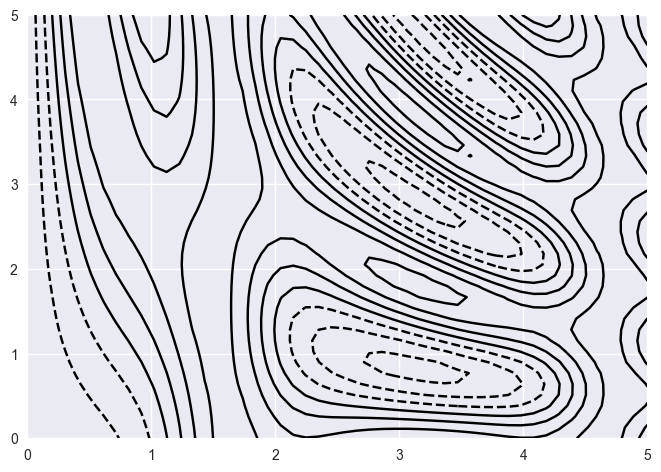

In [5]:
plt.contour(X, Y, Z, colors='black');

Tenga en cuenta que, de forma predeterminada, cuando se utiliza un solo color, los valores negativos se representan con líneas discontinuas y los valores positivos con líneas continuas.
Alternativamente, las líneas se pueden codificar por colores especificando un mapa de colores con el argumento ``cmap``.
Aquí, también especificaremos que queremos que se dibujen más líneas: 20 intervalos espaciados de manera uniforme dentro del rango de datos:

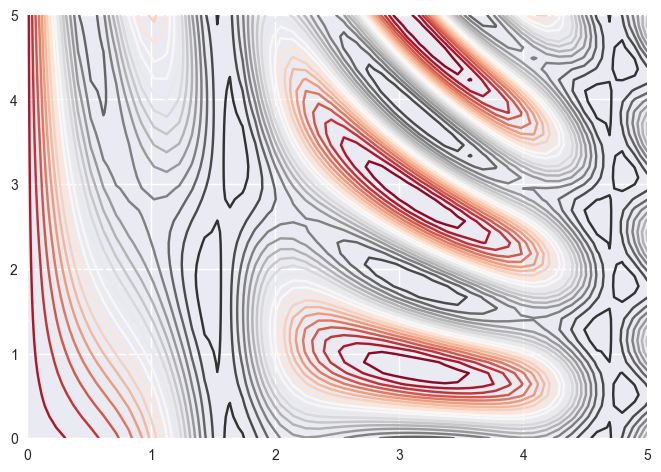

In [6]:
plt.contour(X, Y, Z, 20, cmap='RdGy');

Aquí elegimos el mapa de colores ``RdGy`` (abreviatura de *Red-Gray*), que es una buena opción para datos centrados.
Matplotlib tiene una amplia gama de mapas de colores disponibles, que puede explorar fácilmente en IPython completando el módulo ``plt.cm``:
```
plt.cm.<TAB>
```

Nuestro gráfico se ve mejor, pero los espacios entre las líneas pueden distraer un poco.
Podemos cambiar esto cambiando a un gráfico de contorno relleno usando la función ``plt.contourf()`` (observe la ``f`` al final), que usa en gran medida la misma sintaxis que ``plt.contour()``.

Además, agregaremos un comando ``plt.colorbar()``, que crea automáticamente un eje adicional con información de color etiquetada para el gráfico:

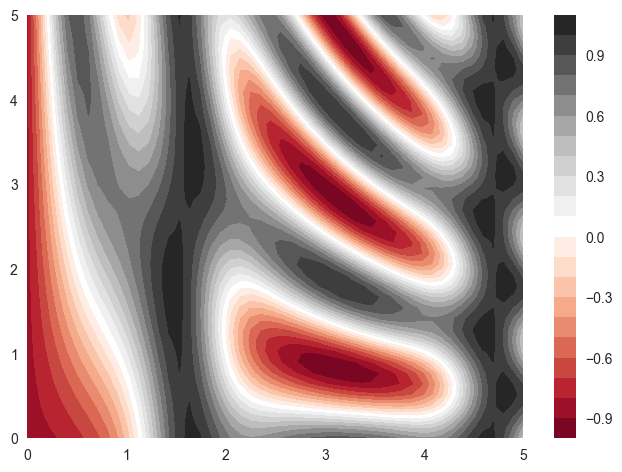

In [7]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

La barra de colores deja claro que las regiones negras son "picos", mientras que las regiones rojas son "valles".

Un problema potencial con este gráfico es que es un poco "desordenado". Es decir, los pasos de color son discretos en lugar de continuos, lo que no siempre es lo deseado.
Esto se podría solucionar configurando el número de contornos en un número muy alto, pero esto da como resultado un gráfico bastante ineficiente: Matplotlib debe representar un nuevo polígono para cada paso del nivel.
Una mejor manera de manejar esto es usar la función ``plt.imshow()``, que interpreta una cuadrícula bidimensional de datos como una imagen.

El siguiente código lo muestra:

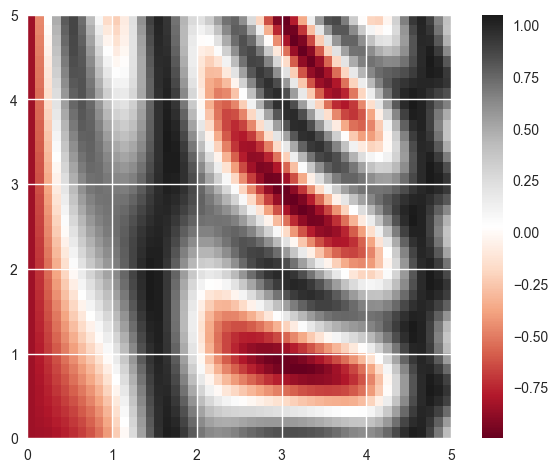

In [8]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy')
plt.colorbar()


Sin embargo, ``imshow()`` tiene algunos problemas potenciales:

- ``plt.imshow()`` no acepta una cuadrícula *x* e *y*, por lo que debe especificar manualmente la *extensión* [*xmin*, *xmax*, *ymin*, *ymax*] de la imagen en el gráfico.
- ``plt.imshow()`` sigue de forma predeterminada la definición de matriz de imágenes estándar, donde el origen está en la esquina superior izquierda, no en la esquina inferior izquierda como en la mayoría de los gráficos de contorno. Esto se debe cambiar cuando se muestran datos en cuadrícula.
- ``plt.imshow()`` ajustará automáticamente la relación de aspecto del eje para que coincida con los datos de entrada; esto se puede cambiar configurando, por ejemplo, ``plt.axis(aspect='image')`` para que coincidan las unidades *x* e *y*.

Por último, a veces puede resultar útil combinar gráficos de contornos y gráficos de imágenes.
Por ejemplo, aquí utilizaremos una imagen de fondo parcialmente transparente (con la transparencia configurada mediante el parámetro ``alpha``) y superpondremos los contornos con etiquetas en los propios contornos (utilizando la función ``plt.clabel()``):

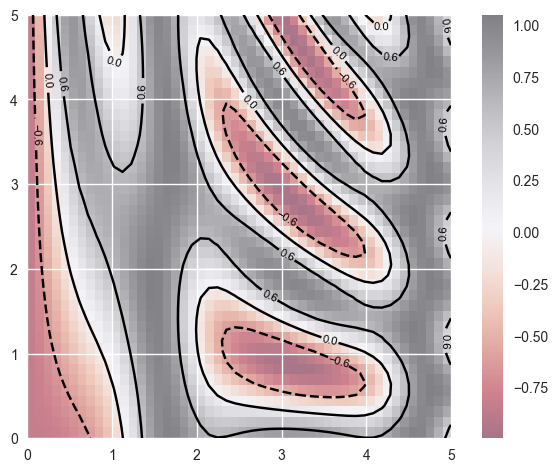

In [9]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar();

La combinación de estas tres funciones—``plt.contour``, ``plt.contourf`` y ``plt.imshow``—ofrece posibilidades casi ilimitadas para mostrar este tipo de datos tridimensionales dentro de un formato bidimensional. trama.
Para obtener más información sobre las opciones disponibles en estas funciones, consulte sus cadenas de documentación.
Si le interesan las visualizaciones tridimensionales de este tipo de datos, consulte [matplotlib](https://matplotlib.org/stable/gallery/images_contours_and_fields/index.html).